<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/entrenamiento_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrenamiento Random forest

In [24]:
# 1. Verificar columnas
print("Columnas disponibles:", df.columns.tolist())

# 2. Seleccionar columnas (ajusta según lo que veas arriba)
columnas_seleccionadas = []
for col in ['Cantidad de días ingreso a CREA',
            'Cantidad de días de ingreso a Biblioteca',
            'Sexo']:
    if col in df.columns:
        columnas_seleccionadas.append(col)
    else:
        print(f"⚠️ Advertencia: Columna '{col}' no encontrada")

# 3. Crear X
if columnas_seleccionadas:
    X = df[columnas_seleccionadas]
    print("Variables seleccionadas:", X.columns.tolist())
else:
    raise ValueError("Ninguna de las columnas solicitadas existe en el DataFrame")

Columnas disponibles: ['Id persona;Sexo;Rol;Departamento;Subsistema;Ciclo;Grado;Zona;Contexto;Año lectivo;Cantidad de días ingreso a CREA;Cantidad de entregas de tareas;Cantidad de Comentarios posteados ;Cantidad de Acciones totales ;Cantidad de días de ingreso a Matific;Cantidad de episodios finalizados en Matific;Cantidad de días de ingreso a PAM;Cantidad de actividades finalizadas en PAM;Cantidad de días de ingreso a Biblioteca;Cantidad de préstamos en biblioteca', 'Id persona', 'Sexo', 'Rol', 'Departamento', 'Subsistema', 'Año lectivo', 'Cantidad de días ingreso a CREA', 'Cantidad de Comentarios posteados ', 'Cantidad de Acciones totales ', 'Cantidad de días de ingreso a Biblioteca', 'Cantidad de préstamos en biblioteca']
Variables seleccionadas: ['Cantidad de días ingreso a CREA', 'Cantidad de días de ingreso a Biblioteca', 'Sexo']


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar datos desde los archivos CSV
estudiantes_df = pd.read_csv('datos_estudiantes_2022.csv')
docentes_df = pd.read_csv('datos_docentes_2022.csv')

# Cargar datos (ejemplo con tus CSV)
df = pd.concat([estudiantes_df, docentes_df])

# Limpieza y feature engineering
# df = df.dropna()  # This line might be dropping necessary columns
# Instead of dropping all rows with any missing values,
# try filling missing values with a suitable strategy
# df = df.fillna(0)  # Example: Fill missing values with 0
# Or, for a specific column:
# df['Interactividad Total'] = df['Interactividad Total'].fillna(df['Interactividad Total'].mean())


df['Rol'] = ['Estudiante'] * len(estudiantes_df) + ['Docente'] * len(docentes_df)

# Print column names to check for typos or missing columns
print("Columnas en estudiantes_df:", estudiantes_df.columns)
print("Columnas en docentes_df:", docentes_df.columns)
print("Columnas en df:", df.columns)

# Check if 'Interactividad Total' is in the columns
if 'Interactividad Total' not in df.columns:
    # If not, try finding the correct column name
    # You might need to inspect the CSV files to find the actual column name
    # For example, the column name might be slightly different like 'InteractividadTotal'
    # If you find the correct column name, replace it in the next line
    print("Warning: 'Interactividad Total' column not found in the DataFrame. Check your CSV files and column names.")
    # For demonstration purposes, let's assume the correct column name is 'InteractividadTotal'
    # Replace this with the actual correct column name if found
    # raise KeyError("'Interactividad Total' column not found in the DataFrame.")

# Versión correcta (usa el nombre exacto de tu columna)
X = df[[ 'Cantidad de días ingreso a CREA',
         'Cantidad de días de ingreso a Biblioteca',
         'Id persona']]    # Make sure this column name exists

y = df['Rol']  # Predecir el rol (estudiante/docente

Columnas en estudiantes_df: Index(['Id persona;Sexo;Rol;Departamento;Subsistema;Ciclo;Grado;Zona;Contexto;Año lectivo;Cantidad de días ingreso a CREA;Cantidad de entregas de tareas;Cantidad de Comentarios posteados ;Cantidad de Acciones totales ;Cantidad de días de ingreso a Matific;Cantidad de episodios finalizados en Matific;Cantidad de días de ingreso a PAM;Cantidad de actividades finalizadas en PAM;Cantidad de días de ingreso a Biblioteca;Cantidad de préstamos en biblioteca'], dtype='object')
Columnas en docentes_df: Index(['Id persona', 'Sexo', 'Rol', 'Departamento', 'Subsistema',
       'Año lectivo', 'Cantidad de días ingreso a CREA',
       'Cantidad de Comentarios posteados ', 'Cantidad de Acciones totales ',
       'Cantidad de días de ingreso a Biblioteca',
       'Cantidad de préstamos en biblioteca'],
      dtype='object')
Columnas en df: Index(['Id persona;Sexo;Rol;Departamento;Subsistema;Ciclo;Grado;Zona;Contexto;Año lectivo;Cantidad de días ingreso a CREA;Cantidad de en

In [27]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# Predecir con datos de prueba
y_pred = model.predict(X_test)

Evaluacion del Modelo

Exactitud (Accuracy): 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

     Docente       1.00      1.00      1.00     16314
  Estudiante       1.00      1.00      1.00    197354

    accuracy                           1.00    213668
   macro avg       1.00      1.00      1.00    213668
weighted avg       1.00      1.00      1.00    213668



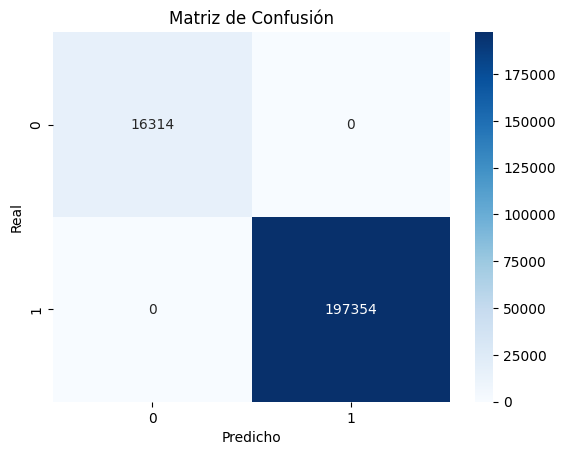

In [28]:
# Métricas de evaluación
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

 Visualización de importancia de características

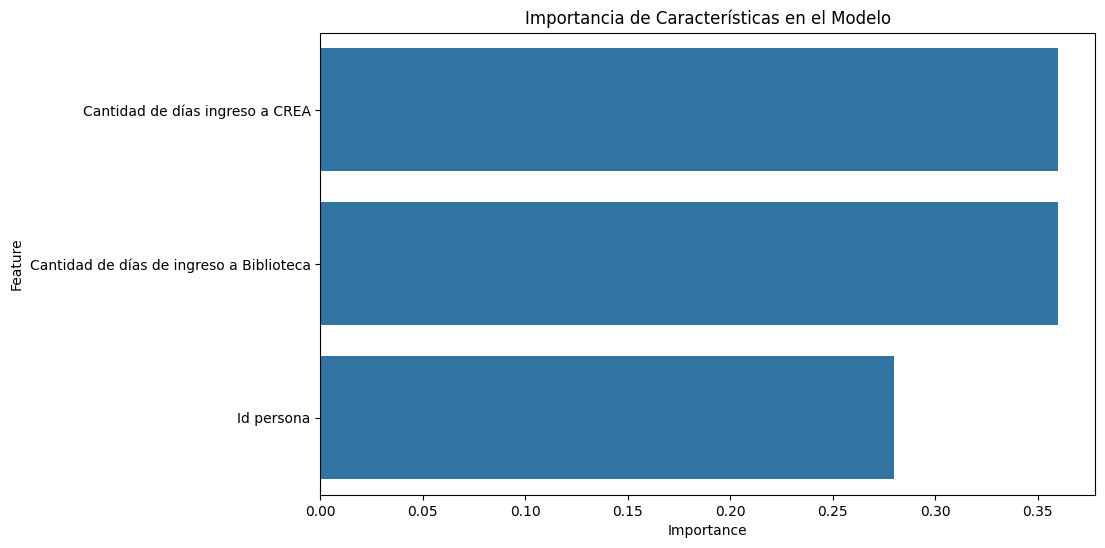

In [29]:
# Importancia de cada feature
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de Características en el Modelo')
plt.show()


In [30]:
import streamlit as st

st.header("🔮 Modelo Predictivo con Random Forest")

# Widgets para predicción
crea_days = st.slider("Días en CREA", 0, 30, 5)
library_days = st.slider("Días en Biblioteca", 0, 30, 2)
total_interaction = st.number_input("Interactividad Total", value=10)

if st.button("Predecir Rol"):
    prediction = model.predict([[crea_days, library_days, total_interaction]])
    st.success(f"El modelo predice que es: {prediction[0]}")

    # Mostrar probabilidades
    probas = model.predict_proba([[crea_days, library_days, total_interaction]])
    st.write(pd.DataFrame({
        'Rol': model.classes_,
        'Probabilidad': probas[0]
    }))

ModuleNotFoundError: No module named 'streamlit'